# Naive Bayes Classification from Scratch

Naive Bayes classification is based on Bayes Theorem. Formula for Bayes theorem is

\begin{equation*}
P(class_i/x)   =\frac{P(x/class_i)*P(class_i)}{P(x)}\\
\end{equation*}
where P(class_i/x) is the posterior probability function or probability that testing example is belongs class i given x(set of independent feature vectors)

P(x/class_i) is the likelihood function (guassian distribution) or probability of feature present in x given class i

p(class_i) is the prior probability function or ratio of number of training examples which belongs to class i to total number of training examples. we can neglect the denominator which represents marginal probability distribution.

Likelihood function can be further splitted into product of individual features likelihood functions on an assumption that all the features are independent and there is no correlation between them (which is practically not possible)

\begin{equation*}
P(class_i/x)=p(x/class_i)* p(class_i)/p(x)\\
\\
\\
P(class_i/x)=p(f_1/class_i)*p(f_2/class_i)*p(f_3/class_i)*.....p(f_n/class_i) *p(class_i)\\
\end{equation*}

where fi= ith feature in the dataset

p(fi/class) is modelled as guassian distribution:

\begin{equation*}
\\
\\p(f_i/class)=\frac{1}{(sqrt(2*pi)*sigma)}* e^\frac{-(f_i-avg(f_i_train))^2}{(2*sigma^2)}
\\
\end{equation*}
where f_i is the testset example's ith feature and avg(f_i_train) is the mean of ith feature i trainset 
    


In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Dec  6 15:20:06 2018

@author: purandur
"""

#imporing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

In [2]:
class Naive_Bayes():
    def __init__(self):
        self.class_data_dic={}
    
    
        
    def fit(self,X_train,y_train):
        def generate_data(class_data_dic,X_train,y_train):
            first_one=True
            first_zero=True
            for i in range(y_train.shape[0]):
                X_temp=X_train[i,:].reshape(X_train[i,:].shape[0],1)
                if y_train[i]==1:
                    if first_one==True:
                        class_data_dic[1]=X_temp
                        first_one=False
                    else:
                        class_data_dic[1]=np.append(class_data_dic[1],X_temp,axis=1)
                elif y_train[i]==0:
                    if first_zero==True:
                        class_data_dic[0]=X_temp
                        first_zero=False
                    else:
                        class_data_dic[0]=np.append(class_data_dic[0],X_temp,axis=1)
            return class_data_dic
    
        self.X_train=X_train
        self.y_train=y_train
        self.class_data_dic[0]=np.array([[]])
        self.class_data_dic[1]=np.array([[]])
        self.class_data_dic=generate_data(self.class_data_dic,self.X_train,self.y_train)
        self.class_data_dic[0]=self.class_data_dic[0].T
        self.class_data_dic[1]=self.class_data_dic[1].T
        self.mean_0=np.mean(self.class_data_dic[0],axis=0)
        self.mean_1=np.mean(self.class_data_dic[1],axis=0)
        self.std_0=np.std(self.class_data_dic[0],axis=0)
        self.std_1=np.std(self.class_data_dic[1],axis=0)
        
        
    def predict(self,X_test):
        def posterior(X,X_train_class,mean_,std_):
            def likelyhood(x,mean,sigma):
                return np.exp(-(x-mean)**2/(2*sigma**2))*(1/(np.sqrt(2*np.pi)*sigma))
            
            product=np.prod(likelyhood(X,mean_,std_),axis=1)
            product=product*(X_train_class.shape[0]/self.X_train.shape[0])
            return product
        
        p_1=posterior(X_test,self.class_data_dic[1],self.mean_1,self.std_1)
        p_0=posterior(X_test,self.class_data_dic[0],self.mean_0,self.std_0)
        return 1*(p_1>p_0)


In [3]:
#reading dataset
Data=pd.read_csv('Social_Network_Ads.csv')
print(Data.head(10))
Data.describe()

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
5  15728773    Male   27            58000          0
6  15598044  Female   27            84000          0
7  15694829  Female   32           150000          1
8  15600575    Male   25            33000          0
9  15727311  Female   35            65000          0


,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [4]:
#training and testing set size
train_size=int(0.75*Data.shape[0])
test_size=int(0.25*Data.shape[0])
print("Training set size : "+ str(train_size))
print("Testing set size : "+str(test_size))

Training set size : 300
Testing set size : 100


In [5]:
#Getting features from dataset
Data=Data.sample(frac=1)
X=Data.iloc[:,[2, 3]].values
y=Data.iloc[:,4].values
X=X.astype(float)

In [6]:
#feature scaling
from FeatureScaling import FeatureScaling
fs=FeatureScaling(X,y)
X=fs.fit_transform_X()

In [7]:
#training set split
X_train=X[0:train_size,:]
y_train=y[0:train_size]

In [8]:
#testing set split
X_test=X[train_size:,:]
y_test=y[train_size:]

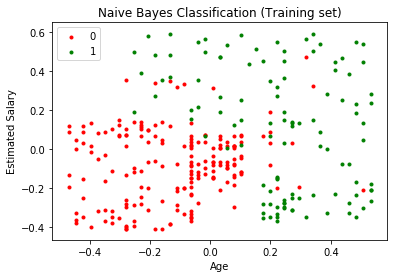

In [20]:
#visualize the training set 
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j,marker='.')
plt.title('Training set')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [9]:
#creating object for classifier
nb=Naive_Bayes()

In [10]:
#fit the classifier
nb.fit(X_train,y_train)

In [11]:
y_pred=nb.predict(X_test)

In [12]:
#getting the confusion matrix
tp=len([i for i in range(0,y_test.shape[0]) if y_test[i]==0 and y_pred[i]==0])
tn=len([i for i in range(0,y_test.shape[0]) if y_test[i]==0 and y_pred[i]==1])
fp=len([i for i in range(0,y_test.shape[0]) if y_test[i]==1 and y_pred[i]==0])
fn=len([i for i in range(0,y_test.shape[0]) if y_test[i]==1 and y_pred[i]==1])
confusion_matrix=np.array([[tp,tn],[fp,fn]])
print(confusion_matrix)

[[62  6]
 [ 8 24]]


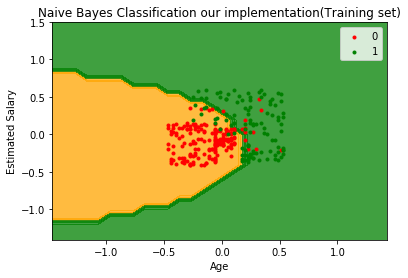

In [13]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.1),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.1))
plt.contourf(X1, X2, nb.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('orange', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j,marker='.')
plt.title('Naive Bayes Classification our implementation(Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

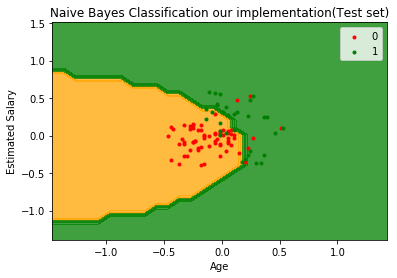

In [14]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.1),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.1))
plt.contourf(X1, X2, nb.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('orange', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j,marker='.')
plt.title('Naive Bayes Classification our implementation(Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [15]:
#lets do the same with sk learn and compare
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None)

In [16]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

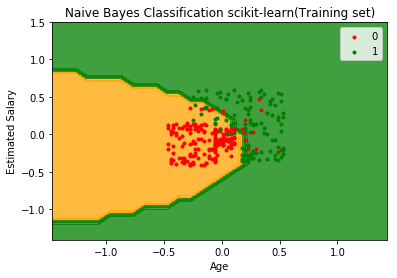

In [18]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.1),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.1))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('orange', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j,marker='.')
plt.title('Naive Bayes Classification scikit-learn(Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

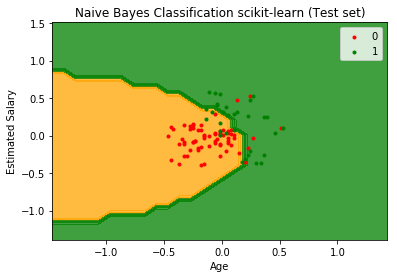

In [19]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.1),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.1))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('orange', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j,marker='.')
plt.title('Naive Bayes Classification scikit-learn (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()